In [1]:
#Data Loading
import pandas as pd

df = pd.read_csv('Crop_recommendation.csv')
print(df.head())


      N     P     K  Temperature   Humidity        PH    Rainfall  Crop
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice
3  74.0  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice


In [2]:
df.shape

(2201, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2197 non-null   float64
 1   P            2195 non-null   float64
 2   K            2198 non-null   float64
 3   Temperature  2195 non-null   float64
 4   Humidity     2197 non-null   float64
 5   PH           2198 non-null   float64
 6   Rainfall     2198 non-null   float64
 7   Crop         2197 non-null   object 
dtypes: float64(7), object(1)
memory usage: 137.7+ KB


In [4]:
df.isnull().sum()

,0
N,4
P,6
K,3
Temperature,6
Humidity,4
PH,3
Rainfall,3
Crop,4


In [5]:
# Create a list of columns to include
include = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Fill only those columns with their own mean
df[include] = df[include].fillna(df[include].mean())

In [7]:
#Basic Transformations
df.rename(columns={'Temperature': 'Temp'}, inplace=True)


In [9]:
df.head()

,N,P,K,Temp,Humidity,PH,Rainfall,Crop
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


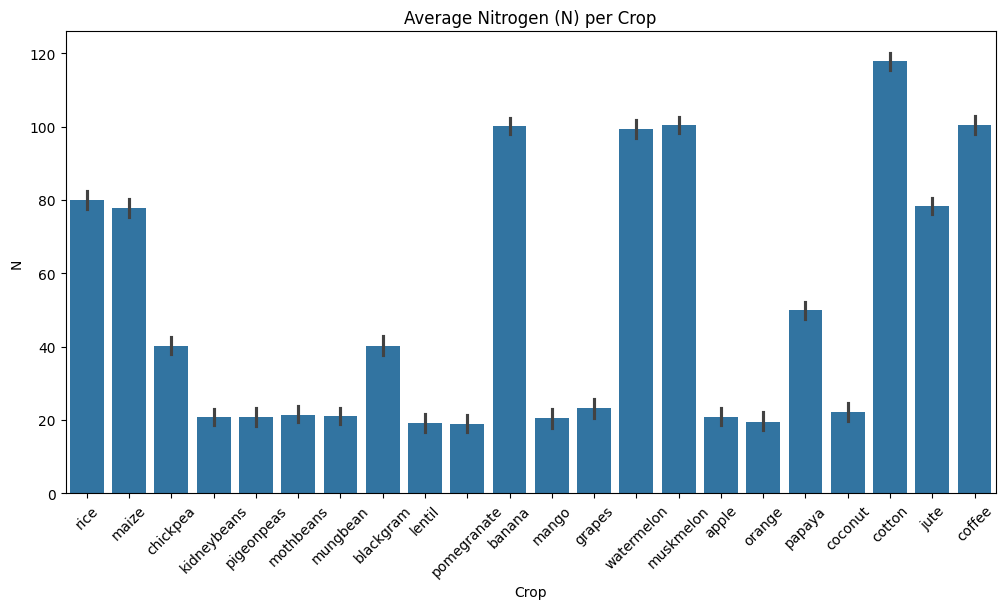

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Crop', y='N', estimator='mean')
plt.title('Average Nitrogen (N) per Crop')
plt.xticks(rotation=45)
plt.show()


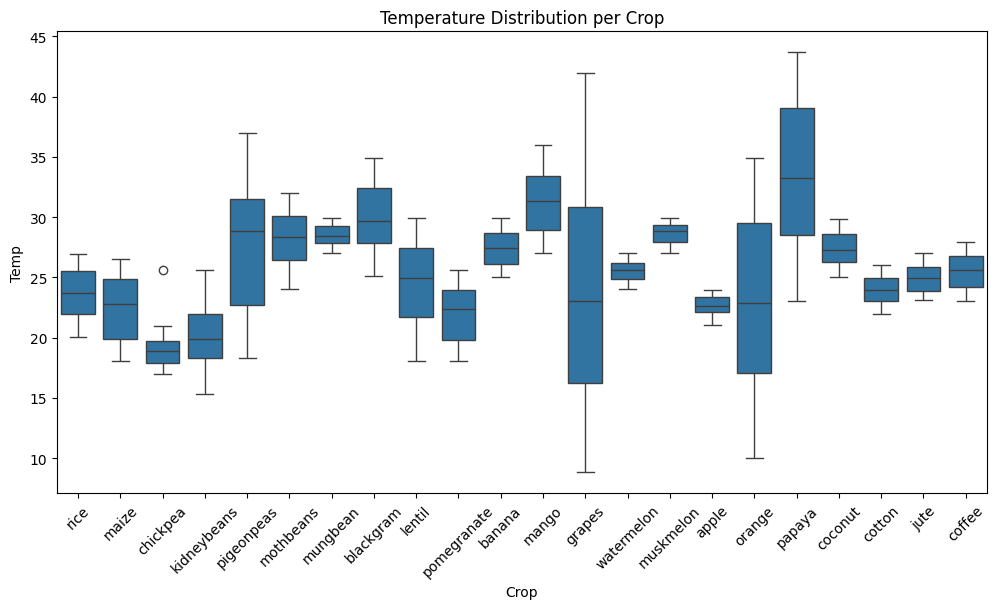

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Crop', y='Temp')
plt.title('Temperature Distribution per Crop')
plt.xticks(rotation=45)
plt.show()


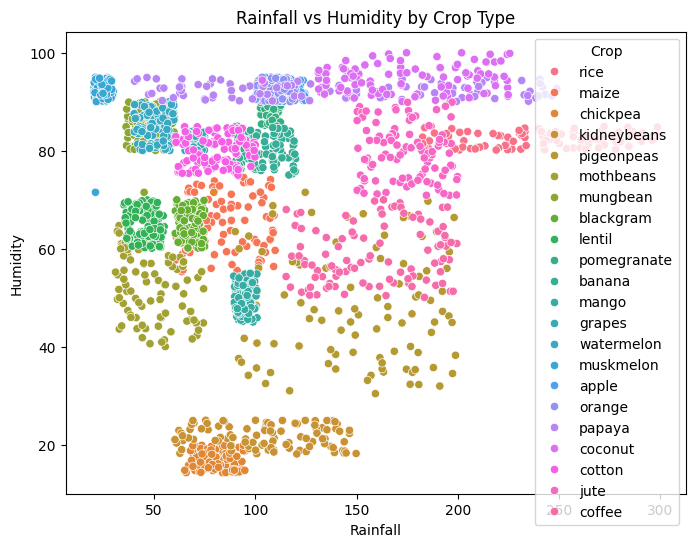

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rainfall', y='Humidity', hue='Crop')
plt.title('Rainfall vs Humidity by Crop Type')
plt.show()


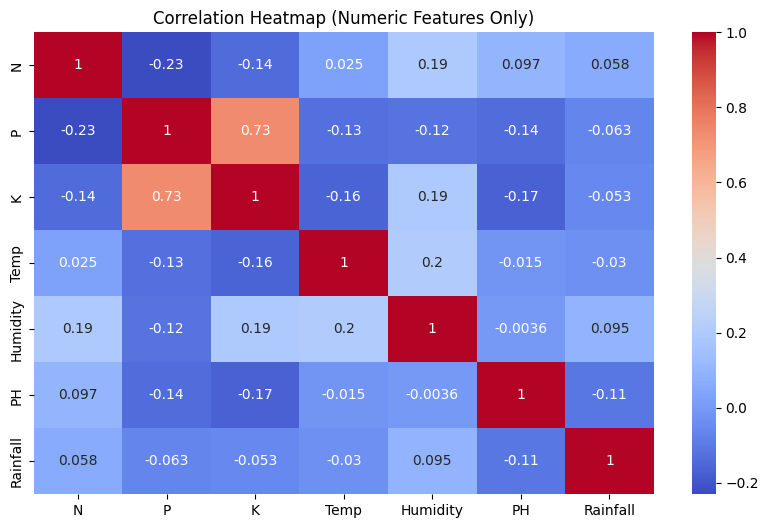

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only select numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()
